
*Zeynep Binerbay 2561090    
*İbrahim Arda Emektar 2561223   
*Aykut Burak Ünyazıcı 2354280   
*Timuçin Eke 2549244   








To start data cleaning and tidiying we imported numpy and pandas.

In [ ]:
import pandas as pd
import numpy as np

This line of code reads and shows the dataset.

In [ ]:
dirtydata = pd.read_excel('car_sell.xlsx')
print(dirtydata)

                            Model  Selling.Price  Kilometers.Driven    Year  \
0             MarutiSwiftDzireVDI       655099.0            34078.0  2016.0   
1           MarutiSwiftDzireVDIBS       357799.0           121017.0  2011.0   
2                   MarutiAltoK10       246499.0            95412.0  2015.0   
3                    HondaCityVMT       898699.0             7349.0  2018.0   
4    HyundaiVernaFLUIDIC1.6SXCRDI       501899.0                NaN  2013.0   
..                            ...            ...                ...     ...   
145             RenaultDuster85PS       484699.0            67407.0  2015.0   
146            Hyundaii10MAGNA1.2       285199.0            57031.0  2013.0   
147               HondaCity1.5EMT       342999.0                NaN  2009.0   
148                  HondaCitySMT       259899.0            99003.0  2009.0   
149                    MarutiRitz       308399.0                NaN  2009.0   

            Owner Fuel.Type  Car.Condition crash_re

This line of code show us the null values as 'True' in a table.



In [ ]:
dirtydata.isnull()

,Model,Selling.Price,Kilometers.Driven,Year,Owner,Fuel.Type,Car.Condition,crash_record,interest_rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False
147,False,False,True,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False


This shows us the total number of null values in each column.

In [ ]:
dirtydata.isnull().sum()

Model                12
Selling.Price        14
Kilometers.Driven    17
Year                 14
Owner                14
Fuel.Type            13
Car.Condition        16
crash_record         17
interest_rate        18
dtype: int64

To calculate total number of missing observations.

In [ ]:
dirtydata.isnull().sum().sum()

135

This line is for checking if there are any duplicated observations, which there are not so we do not have to drop any duplicates.

In [ ]:
dirtydata.duplicated().sum()

0

This shows the column names (titles) in the dataset.

In [ ]:
dirtydata.columns = dirtydata.columns.str.title()
dirtydata.columns

Index(['Model', 'Selling.Price', 'Kilometers.Driven', 'Year', 'Owner',
       'Fuel.Type', 'Car.Condition', 'Crash_Record', 'Interest_Rate'],
      dtype='object')

We fixed the title names to make them in same format.

In [ ]:
dirtydata = dirtydata.rename({'Selling.Price': 'Selling Price'},axis = "columns")
dirtydata.columns


dirtydata = dirtydata.rename({'Kilometers.Driven': 'Kilometers Driven'},axis = "columns")
dirtydata.columns

dirtydata = dirtydata.rename({'Fuel.Type': 'Fuel Type'},axis = "columns")
dirtydata.columns

dirtydata = dirtydata.rename({'Car.Condition': 'Car Condition'},axis = "columns")
dirtydata.columns

dirtydata = dirtydata.rename({'Crash_Record': 'Crash Record'},axis = "columns")
dirtydata.columns

dirtydata = dirtydata.rename({'Interest_Rate': 'Interest Rate'},axis = "columns")
dirtydata.columns

Index(['Model', 'Selling Price', 'Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Car Condition', 'Crash Record', 'Interest Rate'],
      dtype='object')

We arranged the numeric values' type as float.

In [ ]:
dirtydata['Selling Price'] = dirtydata['Selling Price'].astype(float)
dirtydata['Kilometers Driven'] = dirtydata['Kilometers Driven'].astype(float)

This gives the information about data types and non-null value counts.

In [ ]:
dirtydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              138 non-null    object 
 1   Selling Price      136 non-null    float64
 2   Kilometers Driven  133 non-null    float64
 3   Year               136 non-null    float64
 4   Owner              136 non-null    object 
 5   Fuel Type          137 non-null    object 
 6   Car Condition      134 non-null    float64
 7   Crash Record       133 non-null    object 
 8   Interest Rate      132 non-null    float64
dtypes: float64(5), object(4)
memory usage: 10.7+ KB


This code shows us the value counts in Selling Price.

In [ ]:
dirtydata['Selling Price'].value_counts()

5.846547e+11    8
1.592990e+05    2
3.051990e+05    2
6.550990e+05    1
3.075590e+05    1
               ..
2.518990e+05    1
2.774990e+05    1
2.900990e+05    1
6.669990e+05    1
3.083990e+05    1
Name: Selling Price, Length: 127, dtype: int64

This code creates a frequency table to examine the values better and detect irrelevant values.

In [ ]:
for i in dirtydata.select_dtypes(include = 'object').columns:
  print(dirtydata[i].value_counts())

MarutiSwift                 11
MarutiWagonR1.0              5
MarutiAltoK10                4
Hyundaii10MAGNA1.2           3
HondaBrio1.2SMTI             3
                            ..
MarutiBalenoDELTA1.2         1
FordNewFigo1.5TITANIUMAT     1
Hyundaii10SPORTZ             1
MarutiAltoK10VXI             1
MarutiRitz                   1
Name: Model, Length: 91, dtype: int64
First Owner     112
Second Owner     19
Third Owner       5
Name: Owner, dtype: int64
Petrol          73
Diesel          43
 petROL         14
Petrol + CNG     7
Name: Fuel Type, dtype: int64
no    133
Name: Crash Record, dtype: int64


Next two lines of codes are for fixing a wrong entered data value in Selling Price and Fuel Type.

In [ ]:
dirtydata['Selling Price'].loc[dirtydata['Selling Price']=="5,84655E+11"]  = '584655'

In [ ]:
dirtydata['Fuel Type'].loc[dirtydata['Fuel Type']==" petROL"]  = 'Petrol'
dirtydata['Fuel Type'].value_counts()

Petrol          87
Diesel          43
Petrol + CNG     7
Name: Fuel Type, dtype: int64

This is for capitalizing all the values for a better look.

In [ ]:
dirtydata['Crash Record'] = dirtydata['Crash Record'].str.title()
print(dirtydata["Crash Record"].str.capitalize())

0      No
1      No
2      No
3      No
4      No
       ..
145    No
146    No
147    No
148    No
149    No
Name: Crash Record, Length: 150, dtype: object


This is for filling the missing values with 0 for further phases.

In [ ]:
dirtydata.fillna(0)

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Car Condition,Crash Record,Interest Rate
0,MarutiSwiftDzireVDI,655099.0,34078.0,2016.0,First Owner,Diesel,4.6,No,8.097642
1,MarutiSwiftDzireVDIBS,357799.0,121017.0,2011.0,First Owner,Diesel,4.3,No,5.504414
2,MarutiAltoK10,246499.0,95412.0,2015.0,First Owner,Petrol,4.1,No,0.000000
3,HondaCityVMT,898699.0,7349.0,2018.0,First Owner,Petrol,4.9,No,0.000000
4,HyundaiVernaFLUIDIC1.6SXCRDI,501899.0,0.0,2013.0,First Owner,Diesel,4.4,No,6.838781
...,...,...,...,...,...,...,...,...,...
145,RenaultDuster85PS,484699.0,67407.0,2015.0,First Owner,Diesel,4.5,No,6.879647
146,Hyundaii10MAGNA1.2,285199.0,57031.0,2013.0,Second Owner,Petrol,4.3,No,4.279958
147,HondaCity1.5EMT,342999.0,0.0,2009.0,First Owner,Petrol,4.2,No,5.567457
148,HondaCitySMT,259899.0,99003.0,2009.0,Second Owner,Petrol,4.6,No,4.551381


In the next several line of codes, we changed missing categorical values of the dataset with their modes.

In [ ]:
dirtydata['Crash Record'] = dirtydata['Crash Record'].fillna(dirtydata['Crash Record'].mode()[0])

In [ ]:
mode = dirtydata['Fuel Type'].mode()

In [ ]:
dirtydata['Fuel Type'] = dirtydata['Fuel Type'].fillna(dirtydata['Fuel Type'].mode()[0])

In [ ]:
mode = dirtydata['Car Condition'].mode()

In [ ]:
dirtydata['Car Condition'] = dirtydata['Car Condition'].fillna(dirtydata['Car Condition'].mode()[0])

In [ ]:
mode = dirtydata['Year'].mode()

In [ ]:
dirtydata['Year'] = dirtydata['Year'].fillna(dirtydata['Year'].mode()[0])

In [ ]:
mode = dirtydata['Model'].mode()

In [ ]:
dirtydata['Model'] = dirtydata['Model'].fillna(dirtydata['Model'].mode()[0])

In [ ]:
mode = dirtydata['Owner'].mode()

In [ ]:
dirtydata['Owner'] = dirtydata['Owner'].fillna(dirtydata['Owner'].mode()[0])

In [ ]:
mode = dirtydata['Interest Rate'].mode()

In [ ]:
dirtydata['Interest Rate'] = dirtydata['Interest Rate'].fillna(dirtydata['Interest Rate'].mode()[0])

In [ ]:
mode = dirtydata['Model'].mode()

In [ ]:
dirtydata['Model'] = dirtydata['Model'].fillna(dirtydata['Model'].mode()[0])

Since Selling Price does not have any  outliers, we replaced the wrong entered and missing values with mean.

In [ ]:
dirtydata["Selling Price"] = dirtydata["Selling Price"].replace([584654655365.0],np.nan) 
dirtydata["Selling Price"] = dirtydata["Selling Price"].replace([0],np.nan) 
dirtydata["Selling Price"] = dirtydata["Selling Price"].replace([np.nan],dirtydata["Selling Price"].mean()) 

Since Kilometers Driven have outliers, we replaced the wrong entered and missing values with median.




In [ ]:
dirtydata["Kilometers Driven"] =dirtydata["Kilometers Driven"].replace([999999999999.0],np.nan)  
m = dirtydata["Kilometers Driven"].replace([855881.0],np.nan).median()
dirtydata["Kilometers Driven"] =dirtydata["Kilometers Driven"].replace([np.nan],m)

First five observations of the clean data.

In [ ]:
dirtydata.head() 

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Car Condition,Crash Record,Interest Rate
0,MarutiSwiftDzireVDI,655099.0,34078.0,2016.0,First Owner,Diesel,4.6,No,8.097642
1,MarutiSwiftDzireVDIBS,357799.0,121017.0,2011.0,First Owner,Diesel,4.3,No,5.504414
2,MarutiAltoK10,246499.0,95412.0,2015.0,First Owner,Petrol,4.1,No,2.677957
3,HondaCityVMT,898699.0,7349.0,2018.0,First Owner,Petrol,4.9,No,2.677957
4,HyundaiVernaFLUIDIC1.6SXCRDI,501899.0,53900.5,2013.0,First Owner,Diesel,4.4,No,6.838781


This converts the clean data into an excel file.

In [ ]:
dirtydata.to_excel("cleandata2.xlsx")

To start data visualizing we imported matplotlib, seaborn, matplotlib.pyplot, numpy and pandas.

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This code reads the data we cleaned, now we can start visualizing.

In [3]:
a = pd.read_excel("cleandata2.xlsx")

Bar graph of Owner value counts made using seaborn.

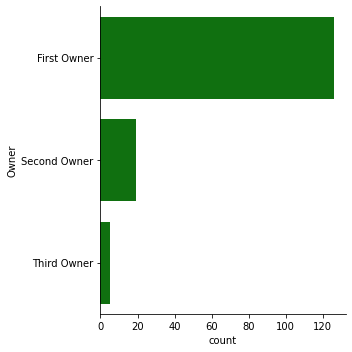

In [4]:
sns.catplot(data=a, y="Owner", 
            kind="count",
            order=a.Owner.value_counts().index, 
            color='green') 

Bar graph of Fuel Type value counts made using matplotlib.

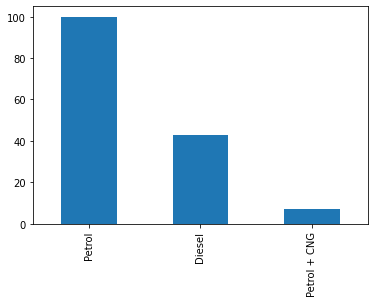

In [5]:
a['Fuel Type'].value_counts().plot(kind='bar')

Scatter plot of correlation between Car Condition and Selling Price made using matplotlib.

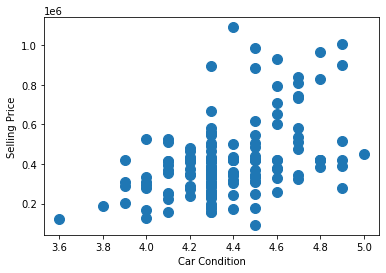

In [6]:
a.plot.scatter(x = 'Car Condition', y = 'Selling Price', s = 100);

Histograms of Fuel Types and Year made using matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c42edf70>,
      dtype=object)

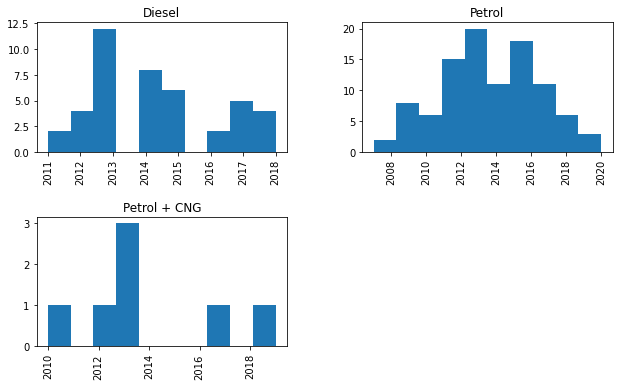

In [7]:
a.hist(by='Fuel Type',
       column='Year',
       figsize=[10, 6])

Distribution of Year made using seaborn.

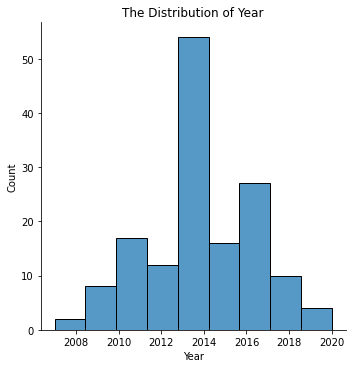

In [8]:
sns.displot(a, x = "Year").set(title = 'The Distribution of Year').set_axis_labels('Year', 'Count')

Joint-plot of Car Condition and Interest Rate categorized by Fuel Type made using seaborn.

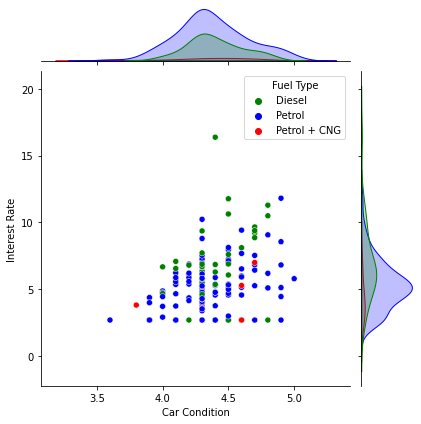

In [9]:
sns.jointplot(data=a,x="Car Condition",y="Interest Rate",hue="Fuel Type", palette = ['green','blue',"red"])